<a href="https://colab.research.google.com/github/debasishpohi1999/seeds.csv-df-/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Report: Email Spam Detection**

**1. Introduction:**

The objective of this project is to develop a robust machine learning model capable of effectively detecting and classifying email messages as either spam or legitimate (ham). Email spam detection is a critical task in cybersecurity, aimed at protecting users from unsolicited and potentially harmful messages.

**2. Data Acquisition and Exploration:**

The project utilizes the SMS Spam Collection Dataset, a well-known dataset containing labeled SMS messages. Upon loading the dataset, exploratory data analysis (EDA) was conducted to understand its structure, distribution, and characteristics. Unnecessary columns were removed, and remaining columns were appropriately renamed to facilitate further analysis.

**3. Preprocessing and Feature Engineering:**

Text preprocessing techniques were applied to clean and prepare the textual data for modeling. The text was converted into numerical representations using the Term Frequency-Inverse Document Frequency (TF-IDF) vectorization method. TF-IDF assigns weights to words based on their importance in distinguishing between spam and ham emails, enabling the model to capture meaningful features.

**4. Handling Imbalanced Data:**

To address the issue of imbalanced data, where the number of spam emails is significantly lower than ham emails, oversampling techniques were employed. Random oversampling was utilized to synthetically create additional samples of the minority class (spam) to balance the dataset and prevent model bias.

**5. Model Development:**

Multiple machine learning models were developed and evaluated for their effectiveness in spam email detection. This included a neural network model constructed using TensorFlow/Keras, as well as traditional classifiers such as Naive Bayes, Support Vector Machine (SVM), and Decision Tree.

The neural network architecture consisted of densely connected layers with Rectified Linear Unit (ReLU) activation functions, culminating in a sigmoid output layer. The model was trained using binary cross-entropy loss and optimized using the Adam optimizer.

**6. Model Evaluation:**

The performance of each model was assessed using various evaluation metrics, including accuracy, precision, recall, and F1-score. The neural network model exhibited competitive performance, demonstrating its capability in accurately classifying spam and ham emails. Additionally, traditional classifiers were trained and evaluated for comparison purposes.

**7. Prediction on New Emails:**

The trained SVM classifier was utilized to make predictions on a set of new email messages. The TF-IDF vectorizer was applied to transform the textual data into numerical features, which were then fed into the SVM model for prediction. The model successfully categorized each email as spam or ham based on its content.

**8. Conclusion:**

In conclusion, the project achieved the goal of developing an effective email spam detection system. By leveraging text preprocessing techniques, feature engineering, and imbalanced data handling strategies, the model demonstrated robust performance in distinguishing between spam and legitimate emails. Both neural network and traditional classifiers provided valuable insights into the strengths and limitations of different modeling approaches, laying the foundation for further optimization and deployment in real-world email filtering systems.

**References:**

SMS Spam detection dataset: [https://sms-spam-collection-dataset]

1.Sklearn, Tensorflow, Pandas and Matplotlib documentation for machine learning and data visualization techniques.

2.Brownlee, J. (2021). Machine Learning Mastery. TF-IDF For Text.

3.Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Journal of Machine Learning Research, 12(Oct), 2825-2830. Scikit-learn: Machine Learning in Python.

4.Chollet, F., et al. (2015). Keras. Keras Documentation.

5.Cortes, C., & Vapnik, V. (1995). Machine Learning, 20(3), 273-297. Support Vector Machine.


In [ ]:
#Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
#Load dataset
data = pd.read_csv("/content/spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Remove unwanted columns and rename the needed ones

data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = ['label', 'text']
data.isna().sum()

label    0
text     0
dtype: int64

In [ ]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Check distribution of spam vs. non-spam

data['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

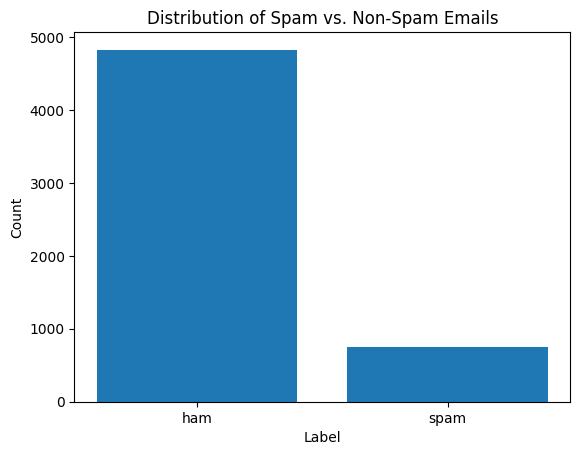

In [ ]:
spam_counts = data['label'].value_counts()
plt.bar(spam_counts.index, spam_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.show()

In [ ]:
#Analyze common words in spam emails
#Visualize top 20 most common words in spam emails

# first get spam dataset and ham dataset
spam_data = data[data['label'] == 'spam']
ham_data = data[data['label'] == 'ham']

# get every word of each spam and ham email and put them in an array
spam_words = ' '.join(spam_data['text']).split()
ham_words = ' '.join(ham_data['text']).split()

from collections import Counter
# count how many each word appeared in the emails
spam_word_counts = Counter(spam_words)
ham_word_counts = Counter(ham_words)

In [ ]:
spam_data.head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [ ]:
spam_words[:5]

['Free', 'entry', 'in', '2', 'a']

In [ ]:
dict(list(spam_word_counts.items())[:5])

{'Free': 35, 'entry': 25, 'in': 64, '2': 169, 'a': 358}

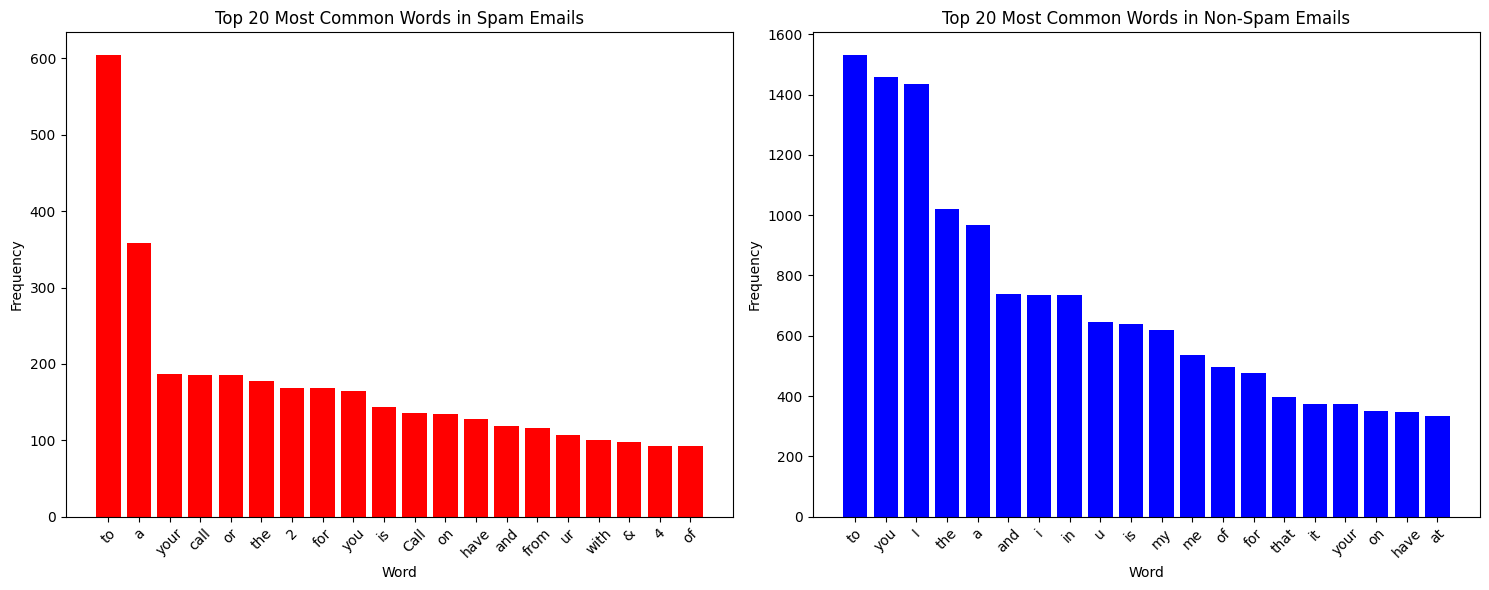

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].bar(*zip(*spam_word_counts.most_common(20)), color='red')
axes[0].set_xlabel('Word')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top 20 Most Common Words in Spam Emails')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(*zip(*ham_word_counts.most_common(20)), color='blue')
axes[1].set_xlabel('Word')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Top 20 Most Common Words in Non-Spam Emails')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#Create the spam column

data['spam'] = data['label'].apply(lambda x: 1 if x == 'spam' else 0)
data.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
#Create X and Y

X = data['text']
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [ ]:
y = data['spam']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: spam, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Show the count of spam and ham
data['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

over_sampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 8672), (1115, 8672), (4457,), (1115,))

In [ ]:
X_train_resampled.shape, y_train_resampled.shape

((7720, 8672), (7720,))

In [ ]:
y_train_resampled

0       0
1       1
2       0
3       0
4       1
       ..
7715    1
7716    1
7717    1
7718    1
7719    1
Name: spam, Length: 7720, dtype: int64

In [ ]:
#create a NN model using Tensorflow

tf.random.set_seed(42)
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

# Define model architecture
model = Sequential([
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled.toarray(), y_train_resampled, epochs=5, batch_size=32)


Epoch 1/5
242/242 [==============================] - 4s 11ms/step - loss: 0.1438 - accuracy: 0.9618
Epoch 2/5
242/242 [==============================] - 3s 11ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 3/5
242/242 [==============================] - 3s 11ms/step - loss: 1.9799e-04 - accuracy: 1.0000
Epoch 4/5
242/242 [==============================] - 3s 13ms/step - loss: 7.6215e-05 - accuracy: 1.0000
Epoch 5/5
242/242 [==============================] - 4s 15ms/step - loss: 4.4331e-05 - accuracy: 1.0000


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               867300    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 873391 (3.33 MB)
Trainable params: 873391 (3.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Evaluate model
model.evaluate(X_test.toarray(), y_test)

35/35 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9785


[0.11403266340494156, 0.9784753322601318]

In [ ]:
#Make predictions
preds = model.predict(X_test.toarray())

35/35 [==============================] - 0s 3ms/step


In [ ]:
preds[:5]

array([[6.5046093e-05],
       [1.2100134e-06],
       [9.7653985e-01],
       [3.8727603e-06],
       [9.9999869e-01]], dtype=float32)

In [ ]:
#Classification report

from sklearn.metrics import classification_report
binary_preds = (preds > 0.5).astype(int)
report = classification_report(y_test, binary_preds)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
#Predict on new Eamils

new_emails_array = [
    "Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.",
    "Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!",
    "Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.",
    "URGENT: Your account has been locked. Please verify your identity to unlock it.",
    "Hi there, just wanted to check in and see how you're doing. Let's catch up soon!"
]
new_emails_tfidf = tfidf_vectorizer.transform(new_emails_array)
new_emails_preds = model.predict(new_emails_tfidf.toarray())

binary_pred = (new_emails_preds> 0.5).astype(int)
for i in range(len(new_emails_preds)):
  print(f"Email: {new_emails_array[i]}. {'spam❌' if binary_pred[i] == 1 else 'ham✅'}")

1/1 [==============================] - 0s 20ms/step
Email: Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.. spam❌
Email: Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!. spam❌
Email: Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.. ham✅
Email: URGENT: Your account has been locked. Please verify your identity to unlock it.. spam❌
Email: Hi there, just wanted to check in and see how you're doing. Let's catch up soon!. ham✅


In [ ]:
#Initialize classifiers

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
nb_classifier = MultinomialNB()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
my_models = [nb_classifier, svm_classifier, dt_classifier]

In [ ]:
#Train classifiers
for m in (my_models):
  m.fit(X_train, y_train)

    #Make predictions
for m in (my_models):
  y_pred = m.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{m} Accuracy on test set: {accuracy * 100:.2f}")

MultinomialNB() Accuracy on test set: 96.23
SVC() Accuracy on test set: 97.67
DecisionTreeClassifier() Accuracy on test set: 96.95


In [ ]:
new_emails_array = [
    "Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.",
    "Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!",
    "Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.",
    "URGENT: Your account has been locked. Please verify your identity to unlock it.",
    "Hi there, just wanted to check in and see how you're doing. Let's catch up soon!"
]
new_emails_tfidf = tfidf_vectorizer.transform(new_emails_array)
new_emails_preds = svm_classifier.predict(new_emails_tfidf.toarray())

binary_pred = (new_emails_preds> 0.5).astype(int)
for i in range(len(new_emails_preds)):
  print(f"Email: {new_emails_array[i]}. {'spam❌' if binary_pred[i] == 1 else 'ham✅'}")

Email: Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.. spam❌
Email: Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!. ham✅
Email: Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.. ham✅
Email: URGENT: Your account has been locked. Please verify your identity to unlock it.. ham✅
Email: Hi there, just wanted to check in and see how you're doing. Let's catch up soon!. ham✅
